In [1]:
# Importing libraries and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import csv
import os

In [2]:
# Study data files
disney_raw_data = "disney_movies_total_gross.csv"

# Read data files
disney_df = pd.read_csv(disney_raw_data)
disney_df.head(5)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [3]:
#Rename column headers
disney_df.columns = ["Movie", "Release Date", "Genre", "Rating", "Total Gross", "Inflated Gross"]
disney_df.head(5)

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [4]:
# Making a array of genres to see how many
#13 different types
genres = disney_df['Genre'].unique()
genres

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

In [5]:
#Adding a year,month, and millions column(updating type to string so can be used in calcuations)- will be used for analysis
disney_df['Year']= ""
disney_df['Year'] = disney_df['Release Date'].astype(str).str[0:4]
disney_df['Month'] = disney_df['Release Date'].astype(str).str[5:7]
disney_df['Inflated Gross'] = disney_df['Inflated Gross'].astype('int64')
disney_df['Million Gross'] = round(disney_df['Inflated Gross']/1000000,2)
disney_df.head(5)

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12,5228.95
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,02,2188.23
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11,2187.09
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,11,1078.51
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,02,920.61


In [6]:
#Looking for missing data
disney_df.count()

Movie             579
Release Date      579
Genre             562
Rating            523
Total Gross       579
Inflated Gross    579
Year              579
Month             579
Million Gross     579
dtype: int64

In [7]:
#filling in missing data with '#Missing Data'  Easier to track
disney_df['Rating'] = disney_df['Rating'].fillna('#Missing Data')
disney_df['Genre'] = disney_df['Genre'].fillna('#Missing Data')
disney_df['Rating'] = disney_df['Rating'].replace('Not Rated', '#Missing Data')
disney_df.head(5)

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12,5228.95
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,02,2188.23
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11,2187.09
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,11,1078.51
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,02,920.61


In [8]:
#Dataframe with only Year>1970- removing some of the highest gross movies as other factors probably related to the high gross
disney_df['Year'] = disney_df['Year'].astype('int64')
disney_1970_df = pd.DataFrame(disney_df[disney_df['Year'] >= 1970])
disney_1970_df.head(5)

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
15,The Aristocats,1970-04-24,Musical,G,55675257,255161499,1970,04,255.16
16,The Boatniks,1970-07-01,Comedy,#Missing Data,18607492,101200742,1970,07,101.20
17,Bedknobs and Broomsticks,1971-10-07,Musical,#Missing Data,17871174,91305448,1971,10,91.31
18,The Apple Dumpling Gang,1975-07-01,Comedy,#Missing Data,31916500,131246872,1975,07,131.25
19,Freaky Friday,1977-01-21,Comedy,#Missing Data,25942000,98067733,1977,01,98.07


In [9]:
#Data >1970  Cleaned out the movies that grossed $0 total 
disney_clean_1970_df = pd.DataFrame(disney_1970_df[disney_df['Million Gross'] > 0])
disney_clean_1970_df.head(5)

<ipython-input-9-6afa60746977>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disney_clean_1970_df = pd.DataFrame(disney_1970_df[disney_df['Million Gross'] > 0])


,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
15,The Aristocats,1970-04-24,Musical,G,55675257,255161499,1970,04,255.16
16,The Boatniks,1970-07-01,Comedy,#Missing Data,18607492,101200742,1970,07,101.20
17,Bedknobs and Broomsticks,1971-10-07,Musical,#Missing Data,17871174,91305448,1971,10,91.31
18,The Apple Dumpling Gang,1975-07-01,Comedy,#Missing Data,31916500,131246872,1975,07,131.25
19,Freaky Friday,1977-01-21,Comedy,#Missing Data,25942000,98067733,1977,01,98.07


In [10]:
# disney_genre_df is used 5 times in the file
#used for boxplot

In [11]:
#All disney_df
disney_genre_df=  disney_df[['Genre','Million Gross']].copy() 
disney_genre_df.head(5)

,Genre,Million Gross
0,Musical,5228.95
1,Adventure,2188.23
2,Musical,2187.09
3,Adventure,1078.51
4,Drama,920.61


In [12]:
#Data ALL YEARS disney_df
# Group genre with average inflated gross
avg_gross_per_genre = pd.DataFrame(disney_df.groupby('Genre').mean()['Million Gross'])
avg_gross_per_genre

,Million Gross
Genre,
#Missing Data,21.624706
Action,137.473500
Adventure,190.397132
Black Comedy,52.243333
Comedy,84.667692
Concert/Performance,57.410000
Documentary,12.718125
Drama,71.892807
Horror,23.415000


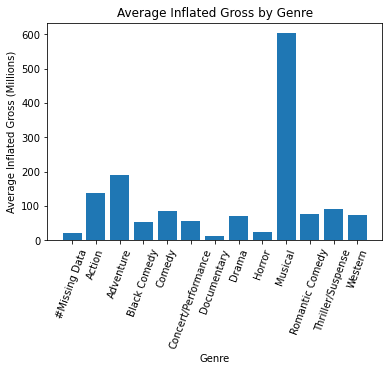

In [13]:
#Data ALL YEARS disney_df
plt.bar(avg_gross_per_genre.index,avg_gross_per_genre['Million Gross'])
plt.xticks(rotation=70)
plt.title("Average Inflated Gross by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Inflated Gross (Millions)")
plt.show()

In [14]:
#Data ALL YEARS disney_df
# Group rating with average inflated gross
avg_rating_clean = pd.DataFrame(disney_df.groupby('Rating').mean()['Million Gross'])
avg_rating_clean['Million Gross'] = avg_rating_clean['Million Gross'].astype('int64')
avg_rating_clean = avg_rating_clean.rename(columns={'Million Gross': 'Avg Inflated Gross (USD)'})
avg_rating_clean

,Avg Inflated Gross (USD)
Rating,
#Missing Data,70
G,291
PG,101
PG-13,102
R,55


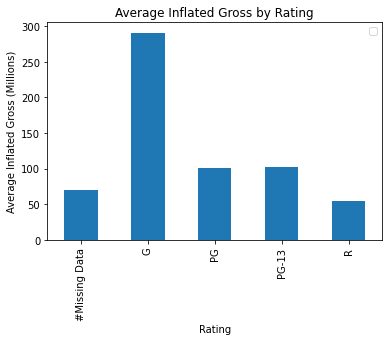

In [15]:
#Data ALL YEARS disney_df
#Bar Graph   Rating vs Inflated Gross
avg_rating_clean.plot.bar()
plt.title('Average Inflated Gross by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Inflated Gross (Millions)')
plt.legend([])

In [16]:
#1970 List 
year_clean_1970_df = pd.DataFrame(disney_clean_1970_df.groupby('Year').mean()['Million Gross'])
year_clean_1970_df.rename(columns = {'Million Gross' : 'Avg Million (USD) Gross'}, inplace = True)
year_clean_1970_df.head(5)

,Avg Million (USD) Gross
Year,
1970,178.18
1971,91.31
1975,131.25
1977,121.22
1979,120.38


In [17]:
#Data ALL YEARS disney_df
year_df = pd.DataFrame(disney_df.groupby('Year').mean()['Million Gross'])
year_df.head(5)

,Million Gross
Year,
1937,5228.95
1940,2187.66
1946,1078.51
1950,920.61
1954,528.28


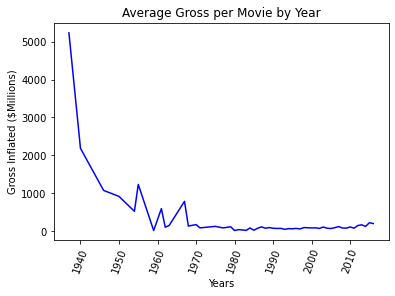

In [18]:
#Data disney_df
## Maybe we can do this by decade as this is really hard to read###

years = year_df.index
gross_mean = year_df['Million Gross'].values
year_line= plt.plot(years, gross_mean, color="blue",label="Mean over Time")

plt.title("Average Gross per Movie by Year")
plt.xlabel("Years")
plt.xticks(rotation=70)
plt.ylabel("Gross Inflated ($Millions)")
plt.show()

y =1.21x + -2318.05


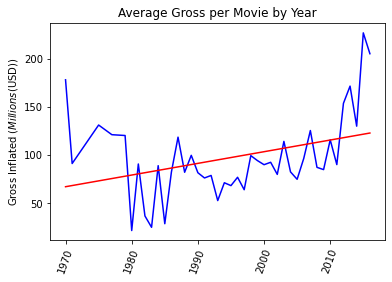

In [19]:
#Data disney_clean_1970_df

years = year_clean_1970_df.index
gross_mean = year_clean_1970_df['Avg Million (USD) Gross'].values

year_line= plt.plot(years, gross_mean, color="blue",label="Mean over Time")
plt.title("Average Gross per Movie by Year")

(slope, intercept, rvalue, pvalue, stderr) = linregress(years, gross_mean)
regress_values = years * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(years,regress_values, "r-")

plt.xticks(rotation=70)
plt.ylabel("Gross Inflated ($Millions ($USD))")
print(line_eq)
plt.show()

In [20]:
# Group genre with >1970 average inflated gross
disney_genre_1970_df = pd.DataFrame(disney_clean_1970_df.groupby('Genre').mean()['Million Gross'])
disney_genre_1970_df.rename(columns = {'Million Gross' : 'Avg Million (USD) Gross'}, inplace = True)
disney_genre_1970_df

,Avg Million (USD) Gross
Genre,
#Missing Data,24.508000
Action,140.998462
Adventure,166.228548
Black Comedy,52.243333
Comedy,75.777360
Concert/Performance,57.410000
Documentary,12.718125
Drama,54.705636
Horror,23.415000


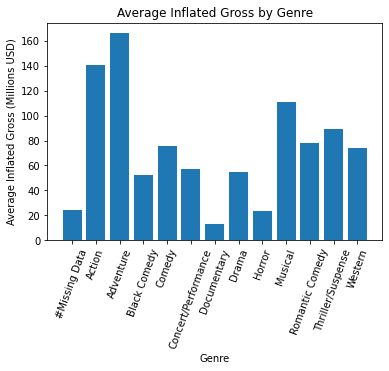

In [21]:
#Data used disney_clean_1970_df
plt.bar(disney_genre_1970_df.index,disney_genre_1970_df['Avg Million (USD) Gross'])
plt.xticks(rotation=70)
plt.title("Average Inflated Gross by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Inflated Gross (Millions USD)")
plt.show()

In [22]:
#Data disney_clean_1970_df
#Breaking down data per Month to see if there is higher success in specific months or seasons
month_1970_df = pd.DataFrame(disney_clean_1970_df.groupby('Month').mean()['Million Gross'])
month_1970_df = month_1970_df.rename(columns={'Million Gross': 'Average Million (USD) Gross per Movie'})
month_1970_df

,Average Million (USD) Gross per Movie
Month,
01,49.147429
02,47.702439
03,72.843276
04,52.033469
05,153.393750
06,170.658571
07,111.667955
08,76.605417
09,35.188605


In [23]:
#Data used from disney_clean_1970_df
# Finding Total # of Movies released per Month
month_1970_count_df = pd.DataFrame(disney_clean_1970_df.groupby('Month').count()['Movie'])
month_1970_count_df = month_1970_count_df.rename(columns={'Movie': '# of Movies'})
month_1970_count_df

,# of Movies
Month,
01,35
02,41
03,58
04,49
05,40
06,49
07,44
08,48
09,43


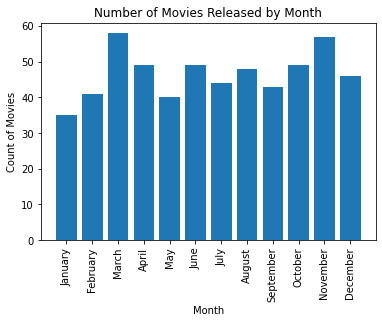

In [24]:
#Data used disney_clean_1970_df
plt.bar(month_1970_count_df.index,month_1970_count_df['# of Movies'])

plt.xticks(rotation=70)

plt.title("Number of Movies Released by Month")
plt.xlabel("Month")
plt.ylabel("Count of Movies")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['January', 'February', 'March', 'April', 'May',
                                                     'June', 'July', 'August', 'September', 'October', 'November',
                                                     'December'], rotation=90)

plt.show()

In [25]:
#Data disney_df
#Drill down data to show last 10 years and make new data frame
disney_df['Year'] = disney_df['Year'].astype('int64')
disney_year_2005_df = pd.DataFrame(disney_df[disney_df['Year'] > 2005])
disney_year_2005_df.head(5)

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
431,Glory Road,2006-01-13,Drama,PG,42647449,54888236,2006,01,54.89
432,Annapolis,2006-01-27,Drama,PG-13,17127992,22044113,2006,01,22.04
433,Roving Mars,2006-01-27,Documentary,G,10407978,12948025,2006,01,12.95
434,Eight Below,2006-02-17,Adventure,PG,81612565,105037235,2006,02,105.04
435,The Shaggy Dog,2006-03-10,Comedy,PG,61123569,78667428,2006,03,78.67


In [26]:
disney_rating_1970_df = pd.DataFrame(disney_clean_1970_df.groupby('Rating').mean()['Million Gross'])
disney_rating_1970_df.rename(columns = {'Million Gross' : 'Avg Million (USD) Gross'}, inplace = True)
disney_rating_1970_df

,Avg Million (USD) Gross
Rating,
#Missing Data,43.885833
G,137.452692
PG,102.087419
PG-13,102.948138
R,55.305686


In [27]:
#removed missing data so can be plotted accuratly
disney_rating_1970_df_missing_removed = disney_rating_1970_df.drop(labels=["#Missing Data"], axis=0)
disney_rating_1970_df_missing_removed

,Avg Million (USD) Gross
Rating,
G,137.452692
PG,102.087419
PG-13,102.948138
R,55.305686


Text(0, 0.5, 'Inflated Gross (Millions USD)')

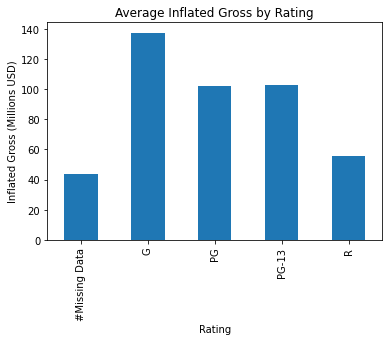

In [28]:
#Bar graph >1970 -Rating vs Avg millions Gross
disney_rating_1970_df.plot.bar(legend=None)
plt.title('Average Inflated Gross by Rating')
plt.xlabel('Rating')
plt.xticks(rotation=90)
plt.ylabel('Inflated Gross (Millions USD)')

In [29]:
#Data disney >2005_df- okay to compare with disney_clean_1970_df - as it is the same type of data just different years
# Use new Data Frame and group rating with average inflated gross
rating_2005_df = pd.DataFrame(disney_year_2005_df.groupby('Rating').mean()['Million Gross'])
rating_2005_df.rename(columns = {'Million Gross' : 'Avg Million (USD) Gross'}, inplace = True)
rating_2005_df

,Avg Million (USD) Gross
Rating,
G,102.792500
PG,123.973182
PG-13,171.340851
R,17.784286


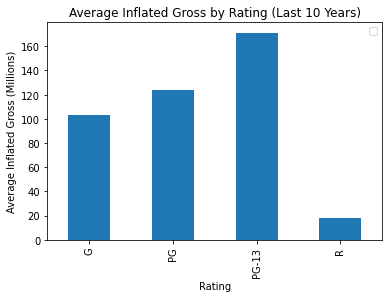

In [30]:
#Data disney >2005_df - okay to compare with disney_clean_1970_df - as it is the same type of data just different years
#Bar Graph   Rating vs Inflated Gross (FOR LAST 10 YEARS)
rating_2005_df.plot.bar()
plt.title('Average Inflated Gross by Rating (Last 10 Years)')
plt.xlabel('Rating')
plt.ylabel('Average Inflated Gross (Millions)')
plt.legend([])

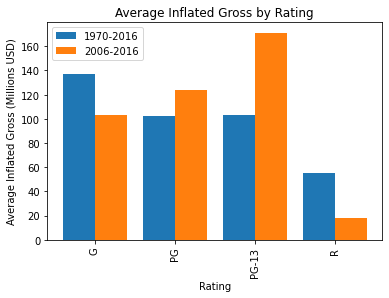

In [31]:
#Data used from disney_clean_1970_df- using data from tables
#x = disney_genre_1970_df.index
x = disney_rating_1970_df_missing_removed.index
y1 = disney_rating_1970_df_missing_removed['Avg Million (USD) Gross'].values
y2 = rating_2005_df['Avg Million (USD) Gross'].values

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.4)
plt.bar(x_axis + 0.2, y2, 0.4)
plt.xticks(x_axis, x, rotation=90)
plt.title('Average Inflated Gross by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Inflated Gross (Millions USD)')
plt.legend(["1970-2016", "2006-2016"])

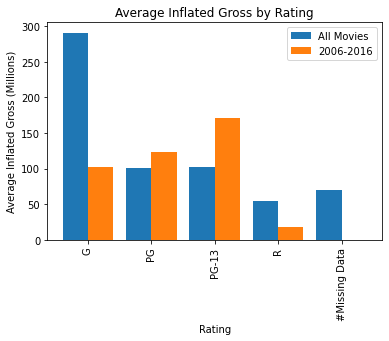

In [32]:
#Data disney_df - using typed in data
#Compare the two rating bar plots (Overall and Last 10 Years)
x = ['G', 'PG', 'PG-13', 'R', '#Missing Data']  
y1 = [291, 101, 102, 55, 70]
y2 = [102.792500, 123.973182, 171.340851, 17.784286, 0]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.4, label='All Movies')
plt.bar(x_axis + 0.2, y2, 0.4, label='Last 10 Years')

plt.xticks(x_axis, x, rotation=90)
plt.title('Average Inflated Gross by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Inflated Gross (Millions)')

plt.legend(["All Movies", "2006-2016"])

In [33]:
#Data disney >2005_df- okay to compare with disney_clean_1970_df - as it is the same type of data just different years
# Use new Data Frame and group genre with average inflated gross
genre_2005_df = pd.DataFrame(disney_year_2005_df.groupby('Genre').mean()['Million Gross'])
genre_2005_df

,Million Gross
Genre,
Action,249.672727
Adventure,201.467273
Comedy,96.835455
Concert/Performance,57.410000
Documentary,13.452500
Drama,61.362069
Horror,24.580000
Musical,89.313333
Romantic Comedy,89.893333


In [34]:
#Data disney >2005_df- okay to compare with disney_clean_1970_df - as it is the same type of data just different years
# Use new Data Frame and group genre with average inflated gross
genre_2005_df = pd.DataFrame(disney_year_2005_df.groupby('Genre').mean()['Million Gross'])
genre_2005_df

,Million Gross
Genre,
Action,249.672727
Adventure,201.467273
Comedy,96.835455
Concert/Performance,57.410000
Documentary,13.452500
Drama,61.362069
Horror,24.580000
Musical,89.313333
Romantic Comedy,89.893333


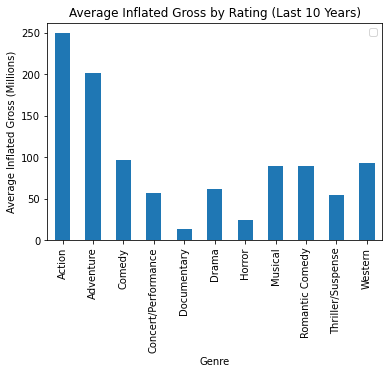

In [35]:
#Data disney >2005_df- okay to compare with disney_clean_1970_df - as it is the same type of data just different years
#Bar Graph   Genre vs Inflated Gross (FOR LAST 10 YEARS)
genre_2005_df.plot.bar()
plt.title('Average Inflated Gross by Rating (Last 10 Years)')
plt.xlabel('Genre')
plt.ylabel('Average Inflated Gross (Millions)')
plt.legend([])

In [36]:
#Data disney_clean_1970_df
#removed Missing data and black comedy information from the >1970 dataframe
disney_genre_1970_df_missing_removed = disney_genre_1970_df.drop(labels=["#Missing Data",  'Black Comedy'], axis=0)
disney_genre_1970_df_missing_removed

,Avg Million (USD) Gross
Genre,
Action,140.998462
Adventure,166.228548
Comedy,75.777360
Concert/Performance,57.410000
Documentary,12.718125
Drama,54.705636
Horror,23.415000
Musical,110.590000
Romantic Comedy,77.777391


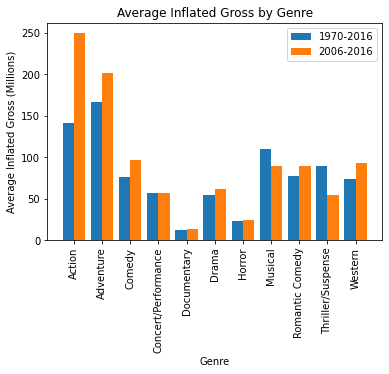

In [37]:
#Data used from disney_clean_1970_df- using data from tables
x = disney_genre_1970_df_missing_removed.index
y1 = disney_genre_1970_df_missing_removed['Avg Million (USD) Gross'].values
y2 = genre_2005_df['Million Gross'].values 


x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.4)
plt.bar(x_axis + 0.2, y2, 0.4)

plt.xticks(x_axis, x, rotation=90)

plt.title('Average Inflated Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Inflated Gross (Millions)')

plt.legend(["1970-2016", "2006-2016"])

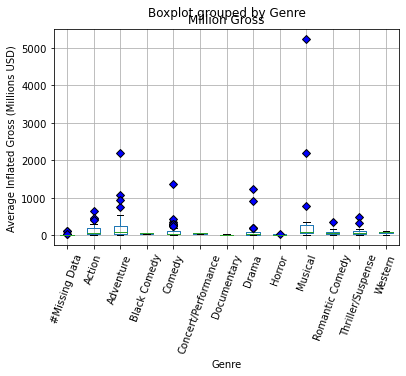

In [38]:
#Data ALL YEARS disney_df
#trying to make a boxplot but I don't think it will work as the data is soooo far spreadout

blue_diamond = dict(markerfacecolor='b', marker='D')

disney_genre_df.boxplot(by='Genre',flierprops=blue_diamond)
plt.xticks(rotation=70)
plt.xlabel('Genre')
plt.ylabel('Average Inflated Gross (Millions USD)')

plt.show()

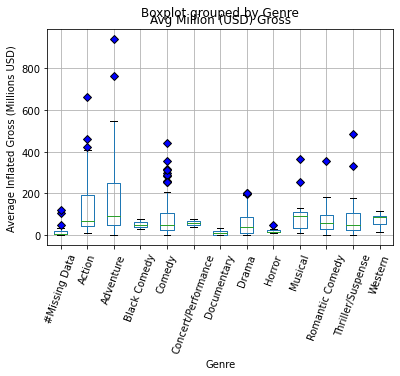

In [39]:
#Data disney_clean_1970_df
#trying to make a boxplot but I don't think it will work as the data is soooo far spreadout
disney_genre_1970_full_df=  disney_clean_1970_df[['Genre','Million Gross']].copy() 
disney_genre_1970_full_df

disney_genre_1970_full_df.rename(columns = {'Million Gross' : 'Avg Million (USD) Gross'}, inplace = True)

blue_diamond = dict(markerfacecolor='b', marker='D')

disney_genre_1970_full_df.boxplot(by='Genre',flierprops=blue_diamond)
plt.xticks(rotation=70)
plt.xlabel('Genre')
plt.ylabel('Average Inflated Gross (Millions USD)')

plt.show()

In [40]:
#Data disney_df
# Make new DataFrame showing Top 10 grossing movies
top_movies = disney_df.sort_values('Million Gross', ascending=False)
top_movies.head(5)

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12,5228.95
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,02,2188.23
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11,2187.09
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1961,01,1362.87
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1955,06,1236.04


y =2.46x + -4819.65


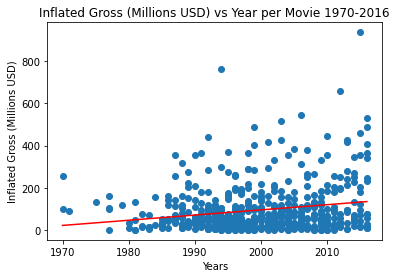

In [41]:
#Data used from disney_clean_1970_df- using data from tables
#x = disney_genre_1970_df.index
x = disney_1970_df.Year
#month = month_1970_df.index
y1 = disney_1970_df['Million Gross'].values

x2 = disney_year_2005_df.Year
#gross_mean = month_1970_df['Average Gross per Movie'].values
y2 = disney_year_2005_df['Million Gross'].values

plt.scatter(x, y1)

plt.title('Inflated Gross (Millions USD) vs Year per Movie 1970-2016')
plt.xlabel('Years')
plt.ylabel('Inflated Gross (Millions USD)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y1)
regress_values = x * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values, "r-")
print(line_eq)
plt.show()
